# Cryptocurrency Linked Security (CLS) Analysis

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt  
from src.iv_engine import *
from src.mc_engine import *
plt.style.use("ggplot")
pd.set_option('display.max_columns', None)  

## 1. Load data

In [2]:
df = pd.read_csv("data/modified/binance_option.csv")
df['date'] = pd.to_datetime(df['date'])

print("df head")
display(df.head())

print("df describe")
display(df.describe())

print("df info")
display(df.info())

df head


,date,hour,symbol,underlying,type,strike,open,high,low,close,volume_contracts,volume_usdt,best_bid_price,best_ask_price,best_bid_qty,best_ask_qty,best_buy_iv,best_sell_iv,mark_price,mark_iv,delta,gamma,vega,theta,openinterest_contracts,openinterest_usdt,spot_close,strike_date,strike_price,expiry_date,days_to_expiry,time_to_expiry,log_moneyness,iv_calc,pct_error
0,2023-05-18 03:00:00+00:00,3,BTC-230630-24000-P,BTCUSDT,P,230630-24000,655.0,655.0,640.0,640.0,16.52,16.52,515.0,540.0,20.11,20.00,NaN,0.490628,527.0,0.485774,-0.192610,0.000060,25.749171,-14.488348,8.18,2.238020e+05,27365.69,230630,24000.0,2023-06-30 08:00:00+00:00,43,0.118298,0.131236,0.485797,-0.004759
1,2023-05-18 04:00:00+00:00,4,BTC-230929-35000-C,BTCUSDT,C,230929-35000,1110.0,1110.0,1110.0,1110.0,0.02,0.02,1040.0,1090.0,1.50,20.00,NaN,0.501729,1064.0,0.496978,0.250231,0.000039,52.619945,-9.748715,13.35,3.645787e+05,27302.62,230929,35000.0,2023-09-29 08:00:00+00:00,134,0.367328,-0.248365,0.496903,0.014941
2,2023-05-18 18:00:00+00:00,18,BTC-230929-27000-P,BTCUSDT,P,230929-27000,3250.0,3250.0,2900.0,3200.0,5.40,5.40,3175.0,3225.0,1.16,15.00,NaN,0.469981,3200.0,0.466073,-0.463981,0.000053,63.969397,-11.162963,6.39,1.700922e+05,26617.62,230929,27000.0,2023-09-29 08:00:00+00:00,133,0.365731,-0.014263,0.466134,-0.012976
3,2023-05-18 19:00:00+00:00,19,BTC-230630-35000-C,BTCUSDT,C,230630-35000,160.0,160.0,155.0,155.0,1.27,1.27,170.0,190.0,15.12,18.91,NaN,0.546607,179.0,0.539598,0.085535,0.000032,14.268334,-9.057831,144.37,3.860216e+06,26734.01,230630,35000.0,2023-06-30 08:00:00+00:00,42,0.116473,-0.269412,0.539604,-0.001282
4,2023-05-18 00:00:00+00:00,0,BTC-230630-36000-C,BTCUSDT,C,230630-36000,260.0,260.0,260.0,260.0,0.00,0.00,205.0,235.0,15.10,5.47,NaN,0.575565,219.0,0.566146,0.095028,0.000032,15.928293,-10.415103,17.13,4.686603e+05,27357.42,230630,36000.0,2023-06-30 08:00:00+00:00,43,0.118640,-0.274531,0.565630,0.091128


df describe


,hour,open,high,low,close,volume_contracts,volume_usdt,best_bid_price,best_ask_price,best_bid_qty,best_ask_qty,best_buy_iv,best_sell_iv,mark_price,mark_iv,delta,gamma,vega,theta,openinterest_contracts,openinterest_usdt,spot_close,strike_date,strike_price,days_to_expiry,time_to_expiry,log_moneyness,iv_calc,pct_error
count,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,2.469450e+05,246945.000000,246945.000000,0.0,2.469450e+05,246945.000000,246945.000000,246945.000000,2.469450e+05,246945.000000,246945.000000,246249.000000,2.462490e+05,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000
mean,11.506530,1251.675616,1282.867582,1218.036466,1246.916986,3.810883,3.810883,1251.487254,1.879218e+03,6.087986,6.658754,NaN,5.270663e-01,1322.355340,0.480228,0.017372,6.042850e-05,29.303748,-11.710312,54.318417,1.509168e+06,27991.408989,231280.177367,30649.014963,64.493932,0.177886,-0.049610,0.479816,0.086031
std,6.918832,1448.168565,1461.342426,1432.584045,1444.661072,10.418398,10.418398,1346.124753,2.012466e+05,6.536813,6.625328,NaN,4.702572e-01,1428.309921,0.127332,0.422804,4.317550e-05,19.116959,6.557878,59.718655,1.643201e+06,1713.018686,1768.675511,10136.339397,44.269451,0.121207,0.283193,0.127298,0.446550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,-1.000000e-08,1.000000,0.210597,-0.983233,2.000000e-08,0.004375,-65.029465,0.000000,0.000000e+00,24923.510000,230609.000000,15000.000000,16.000000,0.043806,-1.160528,0.210394,-25.686115
25%,6.000000,160.000000,165.000000,150.000000,155.000000,0.000000,0.000000,170.000000,2.000000e+02,1.500000,2.170000,NaN,4.117107e-01,187.000000,0.396769,-0.233995,2.831000e-05,13.843562,-15.081707,13.310000,3.622672e+05,26551.150000,230804.000000,25000.000000,28.000000,0.078485,-0.152763,0.396478,0.013989
50%,12.000000,625.000000,655.000000,585.000000,615.000000,0.030000,0.030000,680.000000,7.350000e+02,2.800000,3.370000,NaN,4.689318e-01,714.000000,0.453455,0.020871,5.396000e-05,26.259340,-10.897994,34.670000,9.869583e+05,27422.240000,230929.000000,29000.000000,54.000000,0.147958,-0.027287,0.453166,0.062197
75%,18.000000,1935.000000,1990.000000,1895.000000,1935.000000,2.470000,2.470000,2030.000000,2.180000e+03,8.500000,10.660000,NaN,5.519676e-01,2122.000000,0.530173,0.284672,8.222000e-05,41.850089,-7.258702,73.480000,2.032359e+06,29601.910000,231124.000000,33000.000000,85.000000,0.232717,0.091937,0.529772,0.141714
max,23.000000,8940.000000,8940.000000,8940.000000,8940.000000,284.470000,284.470000,7160.000000,1.000000e+08,134.780000,61.740000,NaN,9.999999e+00,9989.000000,1.309616,0.959291,2.572600e-04,87.368908,-0.012977,465.420000,1.280275e+07,33315.920000,240329.000000,85000.000000,180.000000,0.495437,0.797985,1.300698,21.670286


df info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   date                    246945 non-null  datetime64[ns, UTC]
 1   hour                    246945 non-null  int64              
 2   symbol                  246945 non-null  object             
 3   underlying              246945 non-null  object             
 4   type                    246945 non-null  object             
 5   strike                  246945 non-null  object             
 6   open                    246945 non-null  float64            
 7   high                    246945 non-null  float64            
 8   low                     246945 non-null  float64            
 9   close                   246945 non-null  float64            
 10  volume_contracts        246945 non-null  float64            
 11  volume_usdt       

None

## 2. Define CSL Product
* Date: **`2025-05-19 00:00:00`**
* Underlying **`Asset: BTC/USDT`**
* Maturity (T): **`3 months (approx. 0.246 years)`**
* Coupon Rate: **`20% (annualized)`**
* Knock-In (KI) Barrier: **` 75% of initial price`**
* Early Redemption (Autocall):
    * **`2 months (0.167 years): If BTC Price ≥ 95% of initial price`**

In [3]:
# Simulation Parameters
snap_mask   = df["date"] == pd.Timestamp("2023-05-19 00:00:00+00:00", tz="UTC")
df_snapshot = df[snap_mask].copy()

S0 = df_snapshot['spot_close'].unique().item()              # Initial BTC Price
T = 3.0 / 12                                                # Maturity: 3 months (years)
N_SIMS = 20000                                              # Number of simulation paths
dt = 1/365.25                                               # Time step size (years)
N_STEPS = int(T/dt)                                         # Number of time steps (daily)
r = 0.                                                      # No risk free interest rate

autocall_time = 2.0/12
autocall_level = 0.95
ki_barrier_level = 0.75
coupon_rate = 0.20

## 3. Create Term Structure Function

In [4]:
# Build the spline for term structure
spline = build_iv_surface_spline(df_snapshot)

def term_structure_func(t:float) -> float:
    k = np.array([0.0]) # at the money (ATM)
    t = np.array([t])
    return spline(k,t).item()

In [5]:
print(f"Paths: {N_SIMS:,}, Steps: {N_STEPS}, Maturity: {T:.2f} years")

# Generate paths
paths = generate_stock_paths(S0, T, r, N_STEPS, N_SIMS, term_structure_func)

# Evaluate payoffs
payoffs, stats = evaluate_cls_payoffs(paths, S0, T, N_STEPS, autocall_time, 
                                        autocall_level, ki_barrier_level, coupon_rate)

# Print statistics
print("\n" + "="*50)
print("CLS SIMULATION RESULTS")
print("="*50)
print(f"Autocall Rate:        {stats['autocall_rate']:.1%}")
print(f"KI Trigger Rate:      {stats['ki_trigger_rate']:.1%}")
print(f"Mean Payoff:          {stats['mean_payoff']:.3f}")
print(f"Payoff Std Dev:       {stats['payoff_std']:.3f}")
print(f"Min Payoff:           {stats['min_payoff']:.3f}")
print(f"Max Payoff:           {stats['max_payoff']:.3f}")
print(f"Expected Return:      {(stats['mean_payoff'] - 1) / T * 100:.1f}% p.a.")

print("\n" + f"fair CLS price: ${stats['mean_payoff']*S0:.3f}")

Paths: 20,000, Steps: 91, Maturity: 0.25 years

CLS SIMULATION RESULTS
Autocall Rate:        57.5%
KI Trigger Rate:      44.6%
Mean Payoff:          0.981
Payoff Std Dev:       0.125
Min Payoff:           0.418
Max Payoff:           1.208
Expected Return:      -7.5% p.a.

fair CLS price: $26383.121


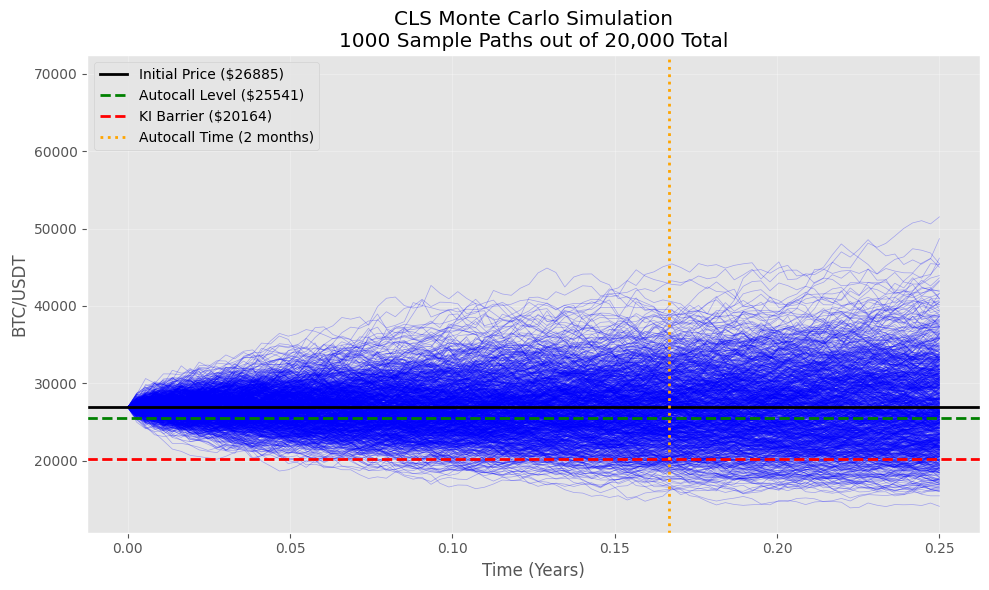

In [6]:
plot_simulation_paths(paths, S0, T, N_STEPS, autocall_time, autocall_level, ki_barrier_level, n_paths_display=1000)